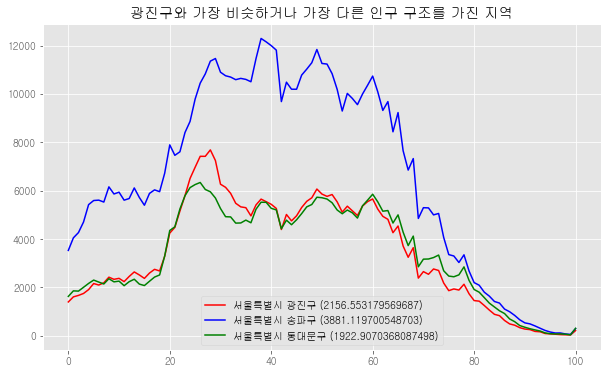

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

f = open('people.csv')
data = csv.reader(f)
next(data)
Gwang = []
temp = []
temp2 = []
name = []
for row in data:
    for i in range(4,len(row)):
        row[i] = int(row[i].replace(",",""))
    if row[1] == '서울특별시 광진구 ':
        Gwang=row[4:]
    temp.append(row[4:])
    name.append(row[1])
temp = np.array(temp[1:])
Gwang = np.array(Gwang)
name= np.array(name[1:])
for i in temp:
    sum = 0
    a=(i-Gwang)**2
    for j in range(0,len(a)):
        sum += a[j]
    temp2.append(sum)
temp2 = np.array(temp2)
MaxIndex=0
MinIndex=0
MAX = temp2[0]
MIN = temp2[0]
for k in range(0,len(temp2)):
    if(MAX<temp2[k]):
        MAX=temp2[k]
        MaxIndex = k 
    if(MIN>temp2[k] and temp2[k]!=0):
        MIN=temp2[k]
        MinIndex = k
f1 = open('people.csv')
data1 = csv.reader(f1)
next(data1)
resultMax = []
resultMin = []
resultTarget = []
for row1 in data1:
    for i in range(4,len(row1)):
        row1[i] = int(row1[i].replace(",",""))
    if row1[1] == name[MaxIndex]:
        resultMax = row1[4:]
    elif row1[1] == name[MinIndex]:
        resultMin = row1[4:]
    elif row1[1] == '서울특별시 광진구 ':
        resultTarget = row1[4:]
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.title('광진구와 가장 비슷하거나 가장 다른 인구 구조를 가진 지역')
plt.plot(resultTarget,'red', label='서울특별시 광진구 ('+str(np.std(resultTarget))+')')
plt.plot(resultMax,'blue', label=name[MaxIndex]+'('+str(np.std(resultMax))+')')
plt.plot(resultMin,'green', label=name[MinIndex]+'('+str(np.std(resultMin))+')')
plt.legend()
plt.show()